# CMPT 459: Final Group Project Steps 1-3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap

Function for plotting data on Bar Chart

In [2]:
def plot_bar_chart(x_values, y_values, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, y_values, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [4]:
cases_df = pd.read_csv('../data/cases_2021_test.csv')
location_df = pd.read_csv('../data/location_2021.csv')
merged_df = pd.merge(cases_df, location_df, how='inner', left_on=['country', 'province'], right_on=['Country_Region', 'Province_State'])

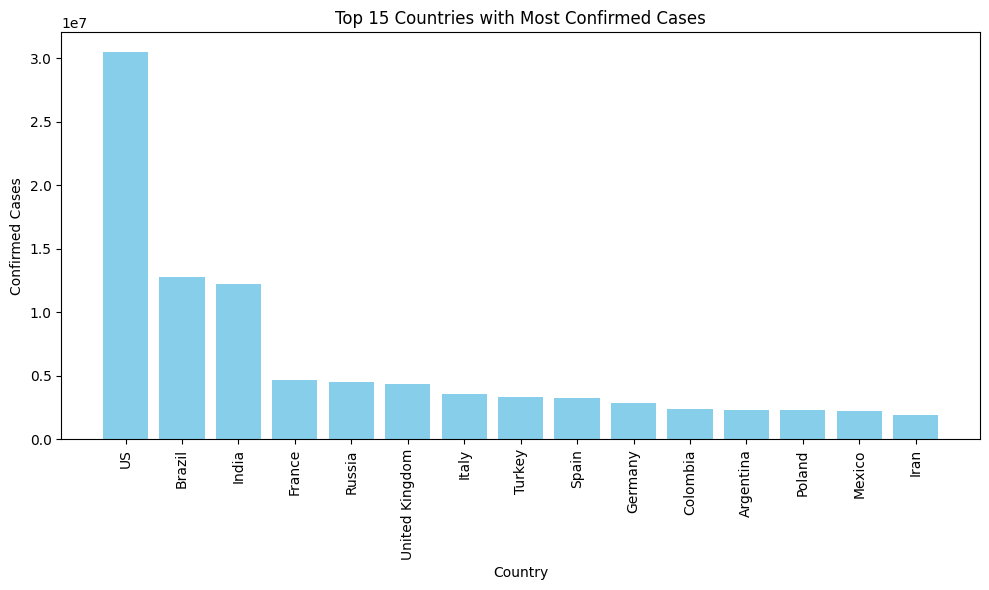

In [5]:
grouped_df = location_df.groupby('Country_Region')['Confirmed'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Confirmed', ascending=False)
top_15_countries = sorted_df.head(15)
plot_bar_chart(top_15_countries['Country_Region'], top_15_countries['Confirmed'], 'Country', 'Confirmed Cases', 'Top 15 Countries with Most Confirmed Cases')

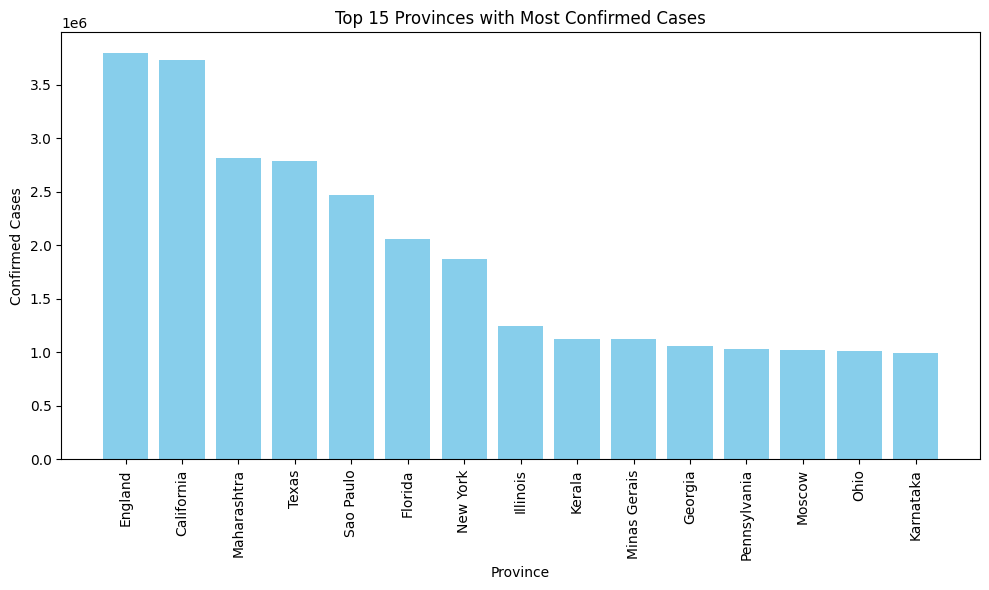

In [6]:
grouped_df = location_df.groupby('Province_State')['Confirmed'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Confirmed', ascending=False)
top_15_provinces = sorted_df.head(15)
plot_bar_chart(top_15_provinces['Province_State'], top_15_provinces['Confirmed'], 'Province', 'Confirmed Cases', 'Top 15 Provinces with Most Confirmed Cases')

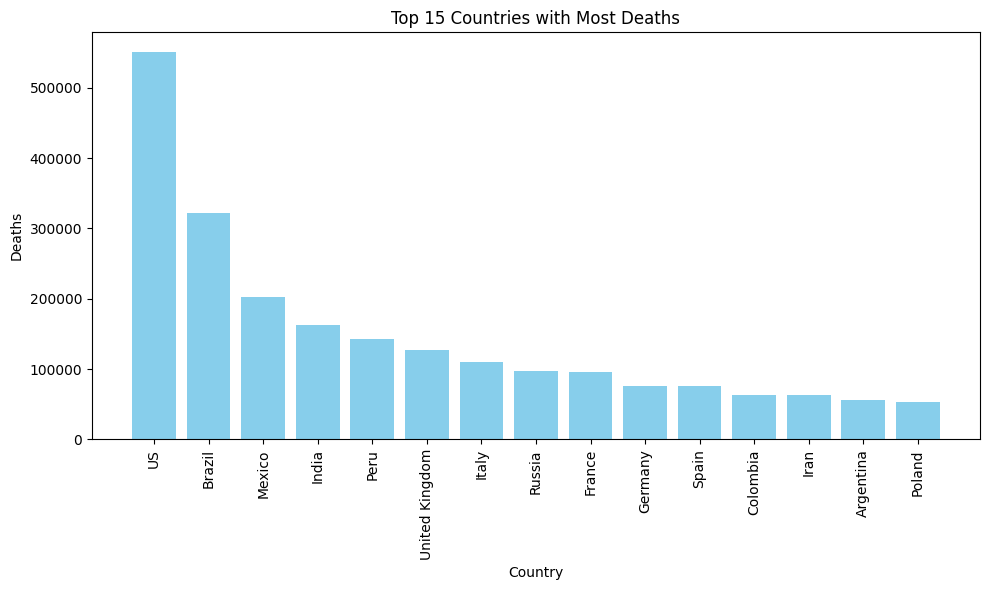

In [7]:
grouped_df = location_df.groupby('Country_Region')['Deaths'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Deaths', ascending=False)
top_15_countries = sorted_df.head(15)
plot_bar_chart(top_15_countries['Country_Region'], top_15_countries['Deaths'], 'Country', 'Deaths', 'Top 15 Countries with Most Deaths')

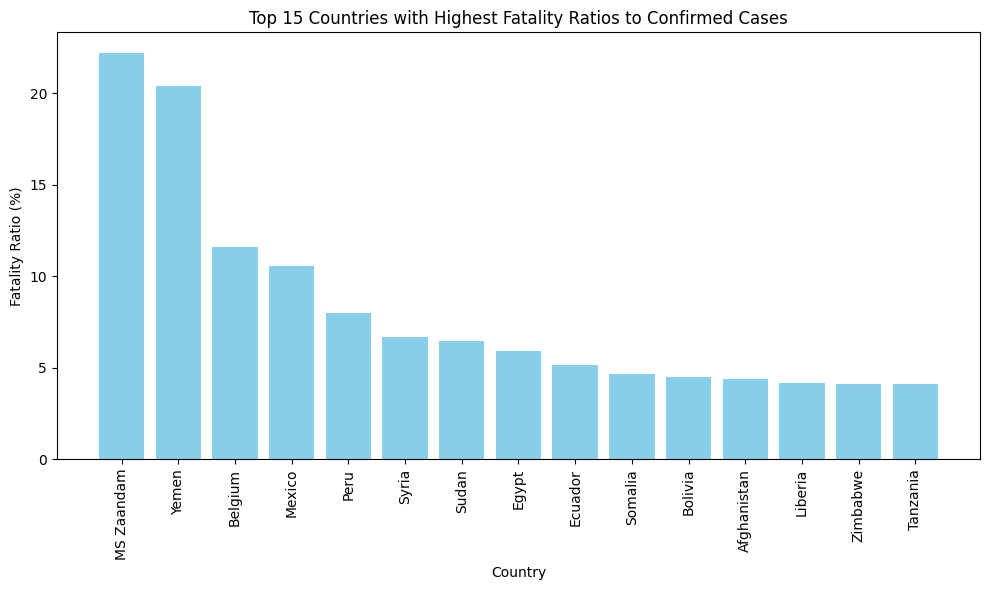

In [9]:
location_df['Fatality_Ratio'] = (location_df['Deaths'] / location_df['Confirmed']) * 100
country_fatality = location_df.groupby('Country_Region')['Fatality_Ratio'].mean().reset_index()
country_fatality = country_fatality.sort_values(by='Fatality_Ratio', ascending=False).head(15)
plot_bar_chart(country_fatality['Country_Region'], country_fatality['Fatality_Ratio'], 'Country', 'Fatality Ratio (%)', 'Top 15 Countries with Highest Fatality Ratios to Confirmed Cases')

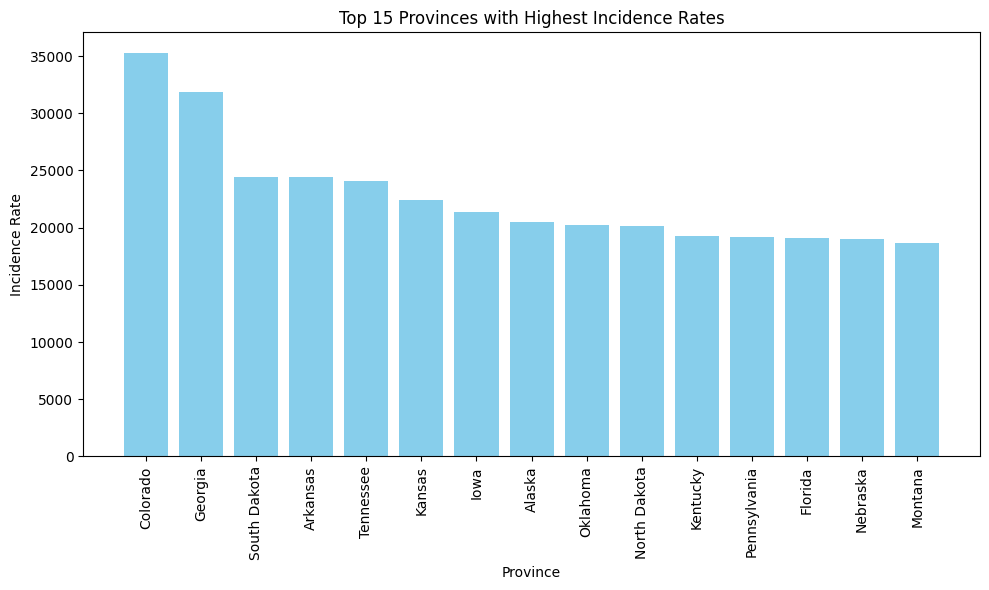

In [10]:
df_sorted = location_df.sort_values(by='Incident_Rate', ascending=False)
top_15_provinces = df_sorted.head(22)
plot_bar_chart(top_15_provinces['Province_State'], top_15_provinces['Incident_Rate'], 'Province', 'Incidence Rate', 'Top 15 Provinces with Highest Incidence Rates')

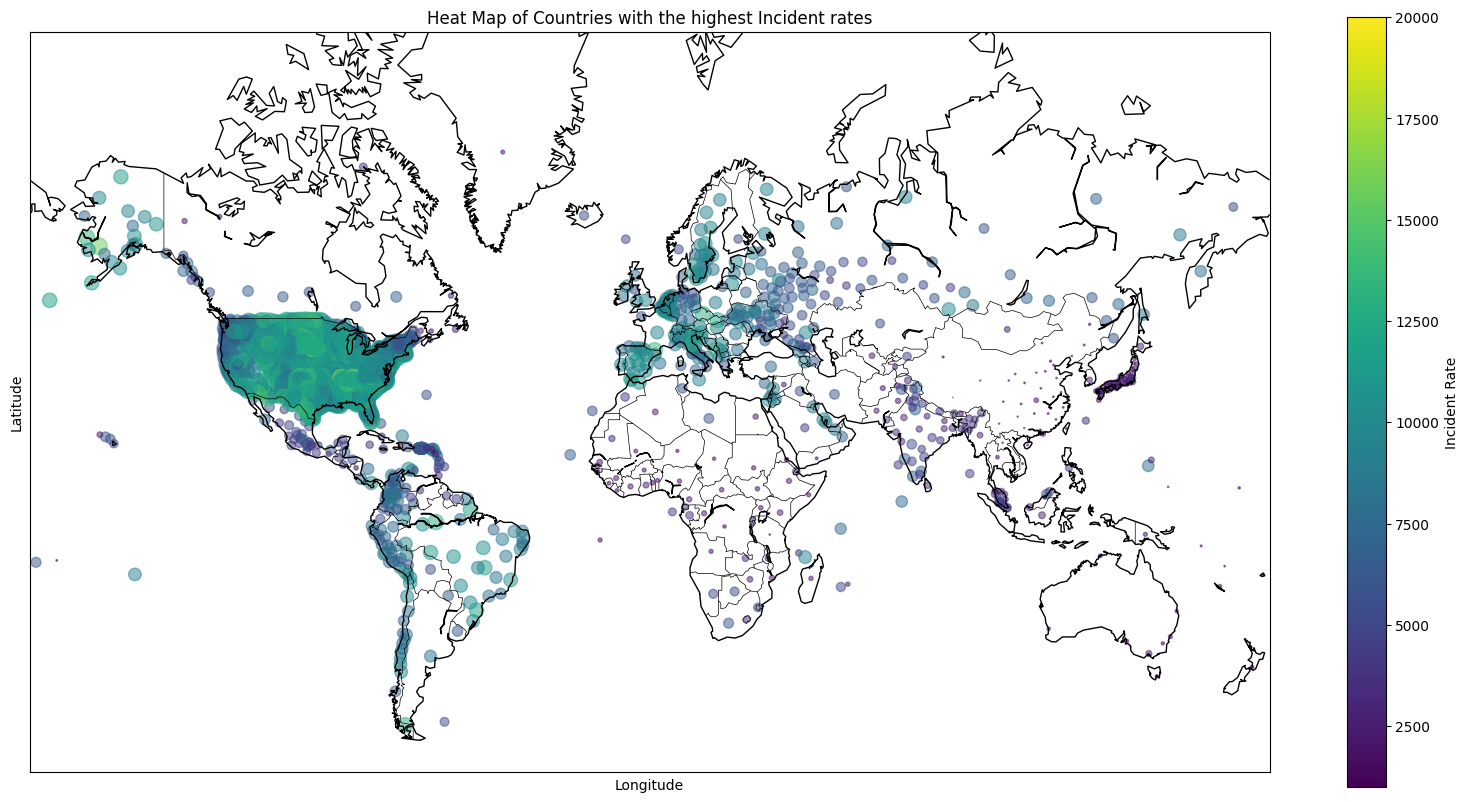

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Heat Map of Countries with the highest Incident rates')

m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

scatter_sizes = location_df['Incident_Rate']**0.5
norm = mcolors.Normalize(1000, 20000)
normalized_sizes = norm(scatter_sizes)

# Basemap scatterplot
x, y = m(location_df['Long_'].values, location_df['Lat'].values)
scatter_generator = m.scatter(x, y, s=scatter_sizes, c=normalized_sizes, cmap='viridis', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Colorbar with explicit axis specified
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly specify the axis using ax=plt.gca()
cbar.set_label('Incident Rate')

plt.show()

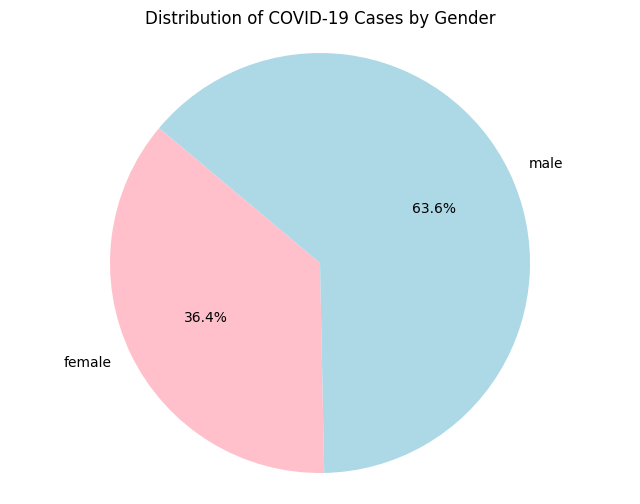

In [12]:
female_cases = merged_df[merged_df['sex'] == 'female']['Confirmed'].sum()
male_cases = merged_df[merged_df['sex'] == 'male']['Confirmed'].sum()

labels = ['female', 'male']
sizes = [female_cases, male_cases]
colors = ['pink', 'lightblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Cases by Gender')
plt.axis('equal')
plt.show()

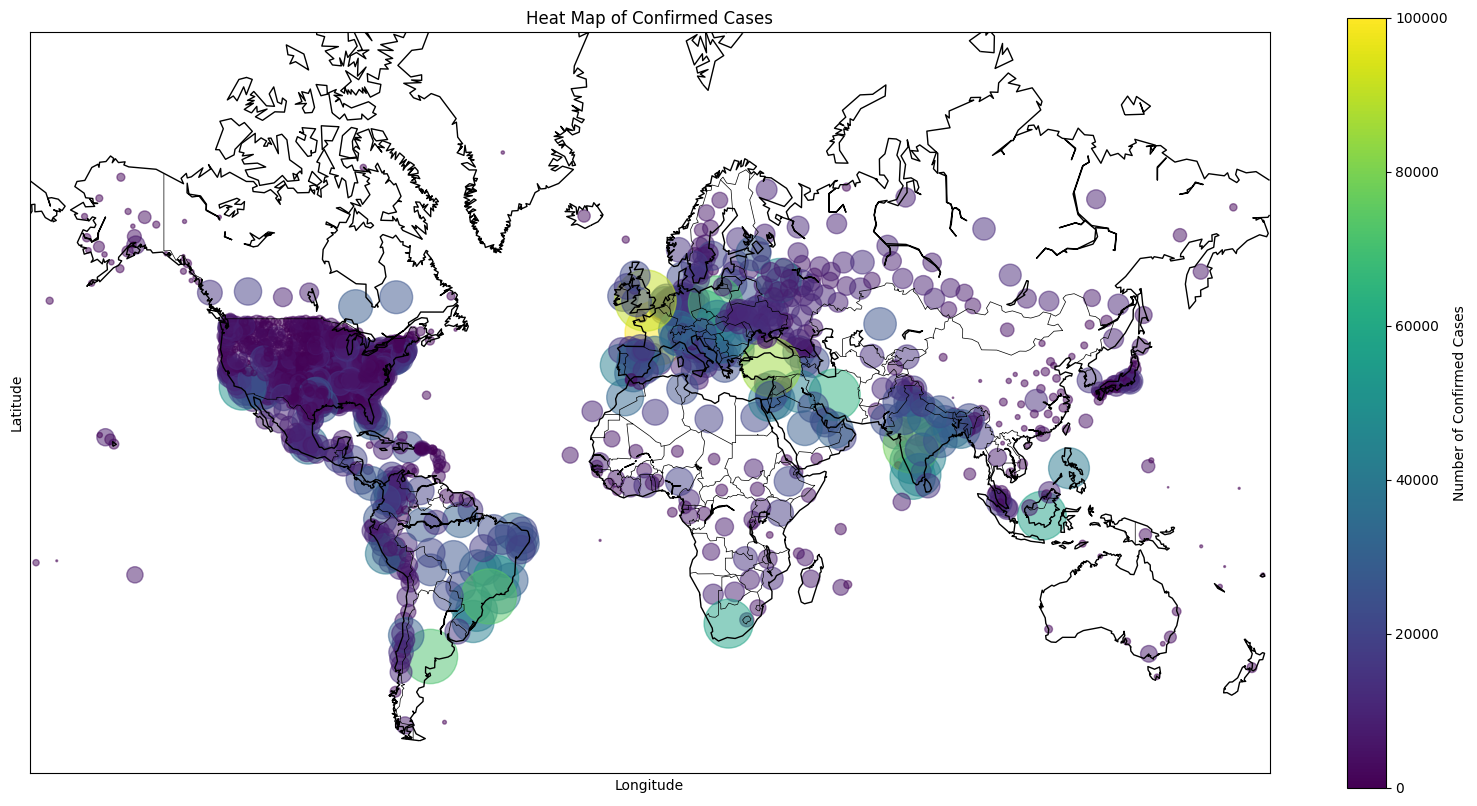

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Heat Map of Confirmed Cases')

m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

scatter_sizes = location_df['Confirmed']**0.5
norm = mcolors.Normalize(0, 100000)
normalized_sizes = norm(scatter_sizes)

# Basemap scatterplot for confirmed cases
x, y = m(location_df['Long_'].values, location_df['Lat'].values)
scatter_generator = m.scatter(x, y, s=scatter_sizes, c=normalized_sizes, cmap='viridis', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Colorbar with explicit axis specified
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly specify the axis using ax=plt.gca()
cbar.set_label('Number of Confirmed Cases')

plt.show()

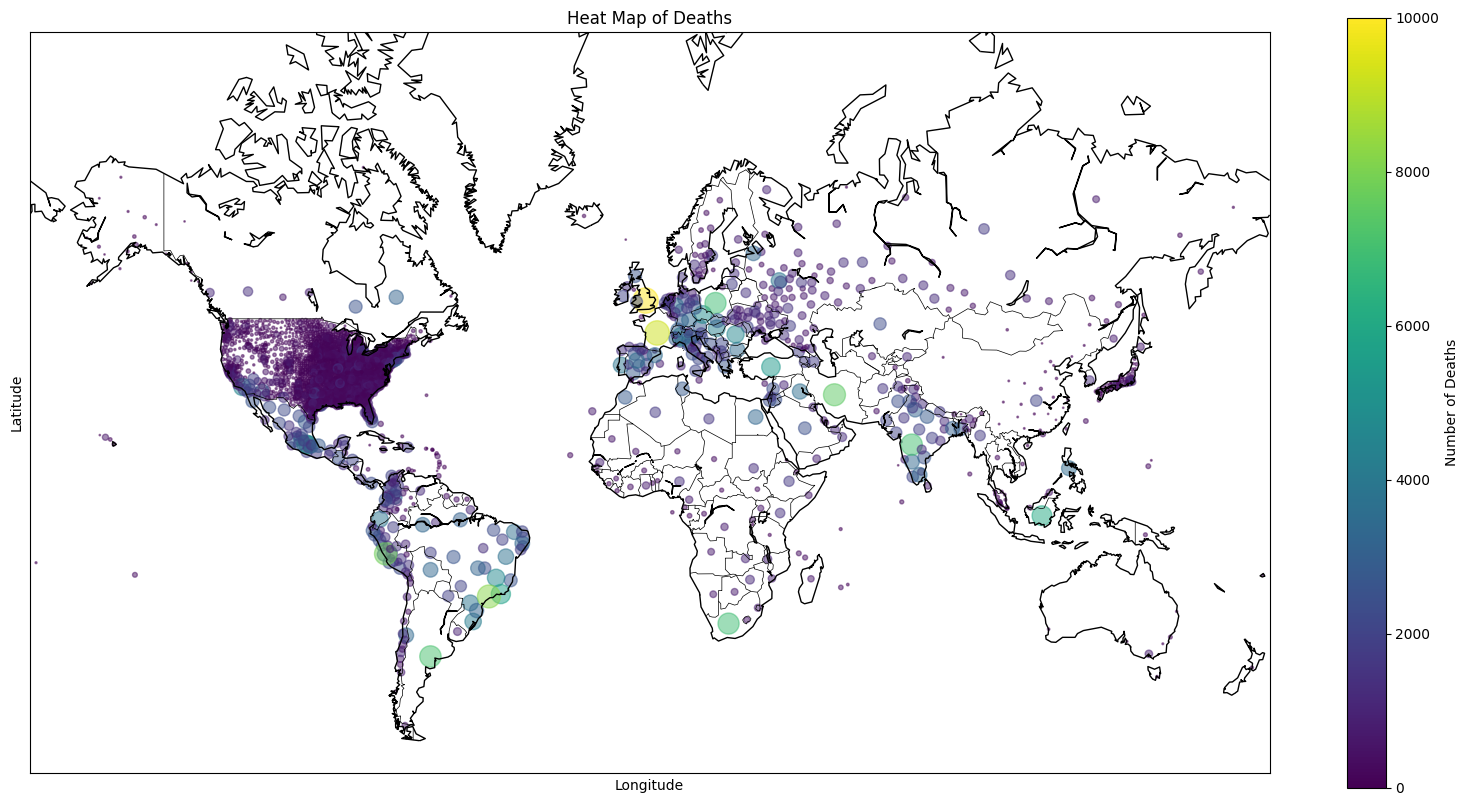

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Heat Map of Deaths')

m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

scatter_sizes = location_df['Deaths']**0.5
norm = mcolors.Normalize(0, 10000)
normalized_sizes = norm(scatter_sizes)

# Basemap scatterplot
x, y = m(location_df['Long_'].values, location_df['Lat'].values)
scatter_generator = m.scatter(x, y, s=scatter_sizes, c=normalized_sizes, cmap='viridis', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Colorbar with explicit axis specified
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly specify the axis using ax=plt.gca()
cbar.set_label('Number of Deaths')

plt.show()


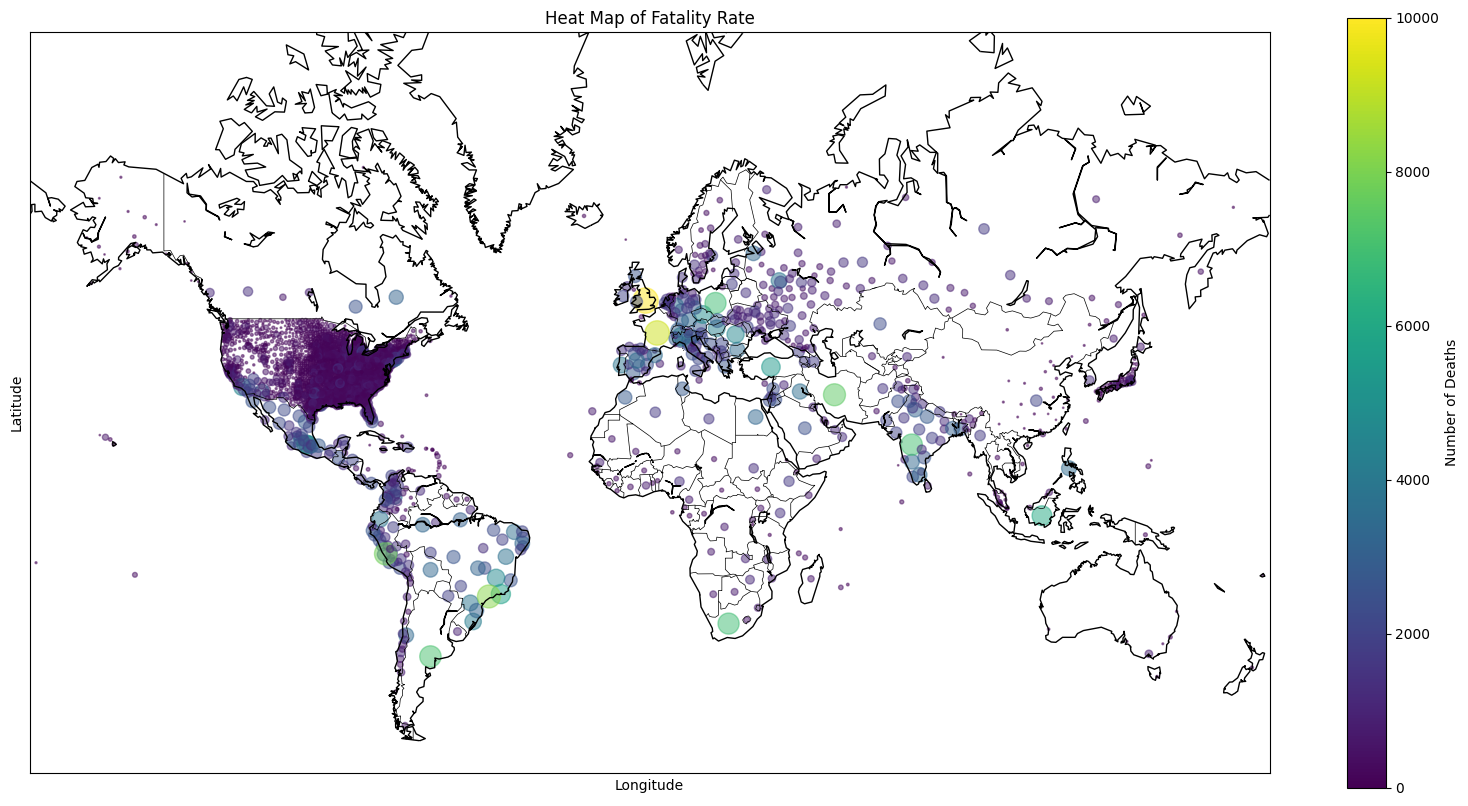

In [16]:
plt.figure(figsize=(20, 10))
plt.title('Heat Map of Fatality Rate')

m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

scatter_sizes = location_df['Deaths']**0.5
norm = mcolors.Normalize(0, 10000)
normalized_sizes = norm(scatter_sizes)

# Basemap scatterplot
x, y = m(location_df['Long_'].values, location_df['Lat'].values)
scatter_generator = m.scatter(x, y, s=scatter_sizes, c=normalized_sizes, cmap='viridis', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Colorbar with explicit axis specified
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())  # Explicitly specify the axis using ax=plt.gca()
cbar.set_label('Number of Deaths')

plt.show()